<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/MERK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**실행**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/mercari-price-suggestion-challenge/train.tsv/train.tsv'

mercari_df = pd.read_csv(file_path, sep='\t')

In [ ]:
mercari_df.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


데이터 정제 (name 컬럼)

-특수문자와 공백만 정리했다.

In [ ]:
import re
import pandas as pd

def clean_name_remove_size(text):
    if pd.isna(text):
        return ""

    text = str(text)

    # 특수문자 → 공백 (알파벳/숫자만 남기기)
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)

    # 공백 정리
    text = re.sub(r"\s+", " ", text).strip()

    return text


def apply_clean_name(mercari_df):
    mercari_df["name_clean"] = mercari_df["name"].fillna("").apply(clean_name_remove_size)
    return mercari_df


확인

In [ ]:
mercari_df = apply_clean_name(mercari_df)

mercari_df[["name", "name_clean"]].head(20)

,name,name_clean
0,MLB Cincinnati Reds T Shirt Size XL,MLB Cincinnati Reds T Shirt Size XL
1,Razer BlackWidow Chroma Keyboard,Razer BlackWidow Chroma Keyboard
2,AVA-VIV Blouse,AVA VIV Blouse
3,Leather Horse Statues,Leather Horse Statues
4,24K GOLD plated rose,24K GOLD plated rose
5,Bundled items requested for Ruie,Bundled items requested for Ruie
6,Acacia pacific tides santorini top,Acacia pacific tides santorini top
7,Girls cheer and tumbling bundle of 7,Girls cheer and tumbling bundle of 7
8,Girls Nike Pro shorts,Girls Nike Pro shorts
9,Porcelain clown doll checker pants VTG,Porcelain clown doll checker pants VTG


상품명에서 첫 단어(tok1), 첫 두 단어(tok2)를 추출한다.

(tok1, brand), (tok2, brand) 조합의 등장 횟수와 비율을 계산한다.

cnt >= 20, ratio >= 0.8 기준을 만족하는 경우만
“토큰 → 브랜드” 매핑에 사용한다.

브랜드가 결측인 행에서

tok2 매핑이 있으면 우선 적용

tok1 매핑이 있으면 다음으로 적용

둘 다 없으면 unknown으로 처리한다.

이렇게 하면 브랜드 명시가 없지만
이름만으로도 브랜드가 거의 확실한 상품들을 정확하게 보완할 수 있다.

In [ ]:
def build_token_brand_map(mercari_df, min_count=20, min_ratio=0.8):
    """
    mercari_df: 전처리된 train 데이터프레임 (name_clean 포함)
    min_count: 해당 토큰으로 등장한 브랜드 수 최소 빈도
    min_ratio: 해당 토큰에서 특정 브랜드가 차지하는 비율 (precision 기준)

    반환:
      tok1_map, tok2_map : {
          토큰 : 대표 브랜드
      } 형태의 dict
    """

    # 1) brand_name 이 존재하는 경우만 학습에 사용
    df_known = mercari_df[~mercari_df["brand_name"].isna()].copy()

    # 2) name_clean 기준으로 토큰 분리
    tokens = df_known["name_clean"].str.split()
    df_known["tok1"] = tokens.str[0]                 # 첫 단어
    df_known["tok2"] = tokens.str[:2].str.join(" ")  # 첫 두 단어

    # 3) tok1/tok2 각각 매핑 생성
    tok_maps = {}

    for col in ["tok1", "tok2"]:
        # (토큰, 브랜드) 조합별 등장 횟수
        grp = (
            df_known
            .groupby([col, "brand_name"])
            .size()
            .reset_index(name="cnt")
        )

        # 해당 토큰의 전체 등장 횟수
        total = grp.groupby(col)["cnt"].sum().reset_index(name="total")
        grp = grp.merge(total, on=col, how="left")

        # ratio = 특정 브랜드가 tok 전체에서 차지하는 비율
        grp["ratio"] = grp["cnt"] / grp["total"]

        # 필터링: 자주 나오고 압도적 비율일 때만 인정
        cond = (grp["cnt"] >= min_count) & (grp["ratio"] >= min_ratio)
        grp_strong = grp[cond].copy()

        # 동일 토큰에 여러 브랜드가 남아 있으면 → 가장 ratio 높은 브랜드만 선택
        grp_strong = (
            grp_strong
            .sort_values(["ratio", "cnt"], ascending=[False, False])
            .drop_duplicates(subset=[col], keep="first")
        )

        # dict 매핑
        tok_maps[col] = dict(zip(grp_strong[col], grp_strong["brand_name"]))

    # 4) 최종 dict 분리
    tok1_map = tok_maps["tok1"]
    tok2_map = tok_maps["tok2"]

    return tok1_map, tok2_map


결측 브랜드 채우기

In [ ]:
def fill_brand_by_token_map(mercari_df, tok1_map, tok2_map):
    """
    mercari_df : 브랜드를 채울 대상 데이터프레임 (name_clean, brand_name 포함)
    tok1_map   : 첫 단어(tok1) → 브랜드 매핑 dict
    tok2_map   : 첫 두 단어(tok2) → 브랜드 매핑 dict

    반환:
      brand_filled 컬럼이 추가된 mercari_df 복사본
        - 원래 brand_name 있으면 그대로 유지
        - 결측일 때만 tok2 → tok1 순서로 채움
        - 그래도 없으면 'unknown'
    """
    df = mercari_df.copy()

    # name_clean 기준 토큰 분리
    tokens = df["name_clean"].str.split()
    df["tok1"] = tokens.str[0]                   # 첫 단어
    df["tok2"] = tokens.str[:2].str.join(" ")    # 첫 두 단어

    # 새 컬럼: 기본값은 원래 brand_name (문자열화)
    df["brand_filled"] = df["brand_name"].astype(str)

    # 채울 대상: brand_name 이 NaN 이거나 완전 공백
    mask_missing = df["brand_name"].isna() | (df["brand_name"].astype(str).str.strip() == "")

    # 1순위: tok2 매핑이 있는 경우 (더 정확하니까 먼저)
    mask_tok2 = mask_missing & df["tok2"].isin(tok2_map.keys())
    df.loc[mask_tok2, "brand_filled"] = df.loc[mask_tok2, "tok2"].map(tok2_map)

    # 2순위: 여전히 비어 있는 경우 tok1 매핑 사용
    mask_missing2 = (
        df["brand_filled"].isna()
        | (df["brand_filled"].astype(str).str.strip() == "")
        | (df["brand_filled"] == "nan")
    )
    mask_tok1 = mask_missing2 & df["tok1"].isin(tok1_map.keys())
    df.loc[mask_tok1, "brand_filled"] = df.loc[mask_tok1, "tok1"].map(tok1_map)

    # 그래도 비어 있으면 unknown 으로 통일
    df["brand_filled"] = df["brand_filled"].replace(["", "nan"], "unknown")
    df["brand_filled"] = df["brand_filled"].fillna("unknown")

    # 임시 컬럼 정리
    df = df.drop(columns=["tok1", "tok2"])
    return df


In [ ]:
# 1) name_clean 만들기
mercari_df = apply_clean_name(mercari_df)

# 2) 토큰 → 브랜드 매핑 생성 (train 기준)
tok1_map, tok2_map = build_token_brand_map(mercari_df, min_count=20, min_ratio=0.8)

# 3) 브랜드 결측 채우기
mercari_df = fill_brand_by_token_map(mercari_df, tok1_map, tok2_map)

# 4) 결과 확인
mercari_df[["name", "name_clean", "brand_name", "brand_filled"]].head(20)


,name,name_clean,brand_name,brand_filled
0,MLB Cincinnati Reds T Shirt Size XL,MLB Cincinnati Reds T Shirt Size XL,NaN,unknown
1,Razer BlackWidow Chroma Keyboard,Razer BlackWidow Chroma Keyboard,Razer,Razer
2,AVA-VIV Blouse,AVA VIV Blouse,Target,Target
3,Leather Horse Statues,Leather Horse Statues,NaN,unknown
4,24K GOLD plated rose,24K GOLD plated rose,NaN,unknown
5,Bundled items requested for Ruie,Bundled items requested for Ruie,NaN,unknown
6,Acacia pacific tides santorini top,Acacia pacific tides santorini top,Acacia Swimwear,Acacia Swimwear
7,Girls cheer and tumbling bundle of 7,Girls cheer and tumbling bundle of 7,Soffe,Soffe
8,Girls Nike Pro shorts,Girls Nike Pro shorts,Nike,Nike
9,Porcelain clown doll checker pants VTG,Porcelain clown doll checker pants VTG,NaN,unknown


In [ ]:
mercari_df["brand_name"] = mercari_df["brand_name"].str.lower()


브랜드 자동 채우기 정확도를 높이기 위해
이름(name_clean)에서 자주 등장하는 토큰과 브랜드의 관계를 통계적으로 분석

In [ ]:
def build_token_brand_map_with_stats(mercari_df, min_count=20, min_ratio=0.8):
    """
    mercari_df: 전처리된 train 데이터프레임 (name_clean, brand_name 포함)
    min_count : (토큰, 브랜드) 조합의 최소 등장 횟수
    min_ratio : 특정 브랜드가 해당 토큰에서 차지하는 비율 (precision 기준)

    반환:
      tok1_map : 첫 단어(tok1)  -> 대표 브랜드 dict
      tok2_map : 첫 두 단어(tok2) -> 대표 브랜드 dict
      tok1_df  : tok1 기준 (토큰, 브랜드, cnt, total, ratio) 테이블
      tok2_df  : tok2 기준 (토큰, 브랜드, cnt, total, ratio) 테이블
    """

    # name_clean 없는 상태에서 호출하면 에러를 명확하게 내주기
    if "name_clean" not in mercari_df.columns:
        raise ValueError("name_clean 컬럼이 없습니다. 먼저 apply_clean_name()을 실행해 주세요.")

    # 1) brand_name 이 있는 행만 사용
    df_known = mercari_df[~mercari_df["brand_name"].isna()].copy()

    # 2) tok1, tok2 생성
    tokens = df_known["name_clean"].str.split()
    df_known["tok1"] = tokens.str[0]                 # 첫 단어
    df_known["tok2"] = tokens.str[:2].str.join(" ")  # 첫 두 단어

    tok_maps = {}
    tok_stats = {}

    # 3) tok1 / tok2 에 대해 동일 로직 수행
    for col in ["tok1", "tok2"]:
        # (토큰, 브랜드)별 카운트
        grp = (
            df_known
            .groupby([col, "brand_name"])
            .size()
            .reset_index(name="cnt")
        )

        # 토큰별 전체 카운트
        total = grp.groupby(col)["cnt"].sum().reset_index(name="total")
        grp = grp.merge(total, on=col, how="left")

        # 비율 계산: 해당 토큰에서 이 브랜드가 차지하는 비율
        grp["ratio"] = grp["cnt"] / grp["total"]

        # 조건: 자주 등장(cnt) + 한 브랜드가 압도적(ratio)
        cond = (grp["cnt"] >= min_count) & (grp["ratio"] >= min_ratio)
        grp_strong = grp[cond].copy()

        # 같은 토큰에 여러 브랜드가 남아 있으면
        # ratio, cnt 기준으로 가장 강한 것만 남김
        grp_strong = (
            grp_strong
            .sort_values(["ratio", "cnt"], ascending=[False, False])
            .drop_duplicates(subset=[col], keep="first")
        )

        # dict 매핑과 통계 DF 저장
        tok_maps[col] = dict(zip(grp_strong[col], grp_strong["brand_name"]))
        tok_stats[col] = grp_strong

    tok1_map = tok_maps["tok1"]
    tok2_map = tok_maps["tok2"]
    tok1_df  = tok_stats["tok1"]   # 컬럼: tok1, brand_name, cnt, total, ratio
    tok2_df  = tok_stats["tok2"]   # 컬럼: tok2, brand_name, cnt, total, ratio

    return tok1_map, tok2_map, tok1_df, tok2_df


In [ ]:
tok1_map, tok2_map, tok1_df, tok2_df = build_token_brand_map_with_stats(
    mercari_df,
    min_count=20,
    min_ratio=0.8
)


In [ ]:
print("원본 브랜드 결측률:", mercari_df["brand_name"].isna().mean())
print("보정 후 unknown 비율:", (mercari_df["brand_filled"]=="unknown").mean())
print("자동 보정된 브랜드 수:", ((mercari_df["brand_name"].isna()) & (mercari_df["brand_filled"]!="unknown")).sum())


원본 브랜드 결측률: 0.4267568725190299
보정 후 unknown 비율: 0.3622882427733578
자동 보정된 브랜드 수: 95577


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
mercari_df.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,name_clean,brand_filled
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,MLB Cincinnati Reds T Shirt Size XL,unknown
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,This keyboard is in great condition and works ...,Razer BlackWidow Chroma Keyboard,Razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,Adorable top with a hint of lace and a key hol...,AVA VIV Blouse,Target
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Leather Horse Statues,unknown
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,24K GOLD plated rose,unknown
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Bundled items requested for Ruie,unknown
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,acacia swimwear,64.0,0,Size small but straps slightly shortened to fi...,Acacia pacific tides santorini top,Acacia Swimwear
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Girls cheer and tumbling bundle of 7,Soffe
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,nike,19.0,0,Girls Size small Plus green. Three shorts total.,Girls Nike Pro shorts,Nike
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Porcelain clown doll checker pants VTG,unknown


중분류(cat2) 기준 텍스트 만들기 (브랜드/카테고리 단어 제거)

중분류별 텍스트 Ridge + OOF 예측 + cat2별 R²/RMSE 피처 생성

그걸 포함해서 LightGBM 학습

1. 카테고리 분해 + 텍스트(브랜드/카테고리 제거 버전)

In [ ]:
import numpy as np
import pandas as pd

def split_category(mercari_df):
    mercari_df["category_name"] = mercari_df["category_name"].fillna("unknown")

    def _split(x):
        parts = str(x).split("/")
        if len(parts) == 1:
            return [parts[0], "unknown", "unknown"]
        elif len(parts) == 2:
            return [parts[0], parts[1], "unknown"]
        else:
            return parts[:3]

    mercari_df[["cat1", "cat2", "cat3"]] = pd.DataFrame(
        mercari_df["category_name"].apply(_split).tolist(),
        index=mercari_df.index
    )
    return mercari_df

mercari_df = split_category(mercari_df)

mercari_df["name_len"] = mercari_df["name"].fillna("").str.len()
mercari_df["desc_len"] = mercari_df["item_description"].fillna("").str.len()


def build_text_without_brand_cat(row):
    # 전체 텍스트 (name_clean + description) 소문자
    name_txt = str(row["name_clean"]) if pd.notna(row["name_clean"]) else ""
    desc_txt = str(row["item_description"]) if pd.notna(row["item_description"]) else ""
    text = (name_txt + " " + desc_txt).lower()
    tokens = text.split()

    # 제거할 단어들: 브랜드 + cat1/2/3
    ban = set()

    # 브랜드
    if "brand_filled" in row and isinstance(row["brand_filled"], str):
        ban |= set(row["brand_filled"].lower().split())

    # 카테고리 단어
    for col in ["cat1", "cat2", "cat3"]:
        if isinstance(row[col], str):
            ban |= set(str(row[col]).lower().split())

    # ban에 없는 토큰만 유지
    filtered = [t for t in tokens if t not in ban]
    return " ".join(filtered)

mercari_df["text_for_ridge"] = mercari_df.apply(build_text_without_brand_cat, axis=1)

mercari_df[["name_clean", "brand_filled", "cat2", "text_for_ridge"]].head(10)


,name_clean,brand_filled,cat2,text_for_ridge
0,MLB Cincinnati Reds T Shirt Size XL,unknown,Tops,mlb cincinnati reds t shirt size xl no descrip...
1,Razer BlackWidow Chroma Keyboard,Razer,Computers & Tablets,blackwidow chroma keyboard this keyboard is in...
2,AVA VIV Blouse,Target,Tops & Blouses,ava viv adorable top with a hint of lace and a...
3,Leather Horse Statues,unknown,Home Décor,leather horse statues new with tags. leather h...
4,24K GOLD plated rose,unknown,Jewelry,24k gold plated rose complete with certificate...
5,Bundled items requested for Ruie,unknown,Other,bundled items requested for ruie banana republ...
6,Acacia pacific tides santorini top,Acacia Swimwear,Swimwear,pacific tides santorini top size small but str...
7,Girls cheer and tumbling bundle of 7,Soffe,Apparel,cheer and tumbling bundle of 7 you get three p...
8,Girls Nike Pro shorts,Nike,Apparel,pro shorts size small plus green. three shorts...
9,Porcelain clown doll checker pants VTG,unknown,Collectibles,porcelain clown checker pants vtg i realized h...


2. 중분류(cat2)별 텍스트 Ridge + OOF 예측 + cat2별 R²/RMSE

cat2 값 하나 고른다. 예: Women/Tops & Blouses

그 cat2에 속한 행만 뽑는다.

그 안에서 KFold(예: 5 fold)로 나눈다.

각 fold마다:

4-1. train fold 텍스트로 TF-IDF 학습

4-2. 그걸로 Ridge 학습

4-3. val fold에 예측 → OOF에 채워넣기

fold별 R², RMSE 저장

cat2별 평균 R², RMSE 기록

In [ ]:
import numpy as np

mercari_df["log_price"] = np.log1p(mercari_df["price"])


In [ ]:
mercari_df["ridge_oof_cat2"] = np.nan


In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd

cat2_metrics = []   # cat2별 R², RMSE 저장 용
min_samples_per_cat2 = 300   # 샘플 부족 cat2는 학습 제외

unique_cat2 = mercari_df["cat2"].unique()

# OOF 예측 컬럼 초기화
mercari_df["ridge_oof_cat2"] = np.nan

for c in unique_cat2:
    idx = mercari_df[mercari_df["cat2"] == c].index
    n_samples = len(idx)

    if n_samples < min_samples_per_cat2:
        continue

    sub = mercari_df.loc[idx]
    texts = sub["text_for_ridge"].fillna("")
    y = sub["log_price"].values

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    oof_pred = np.zeros(n_samples)
    fold_r2 = []
    fold_rmse = []

    for train_pos, val_pos in kf.split(sub):

        train_texts = texts.iloc[train_pos]
        val_texts   = texts.iloc[val_pos]
        y_train = y[train_pos]
        y_val   = y[val_pos]

        # TF-IDF
        vectorizer = TfidfVectorizer(
            max_features=20000,
            ngram_range=(1, 2),
            min_df=5
        )
        X_train = vectorizer.fit_transform(train_texts)
        X_val   = vectorizer.transform(val_texts)

        # Ridge 회귀
        model = Ridge(alpha=1.0, random_state=42)
        model.fit(X_train, y_train)
        pred_val = model.predict(X_val)

        oof_pred[val_pos] = pred_val

        # 성능 기록 (여기 부분 수정됨)
        r2 = r2_score(y_val, pred_val)
        rmse = sqrt(mean_squared_error(y_val, pred_val))

        fold_r2.append(r2)
        fold_rmse.append(rmse)

    # OOF 예측 저장
    mercari_df.loc[idx, "ridge_oof_cat2"] = oof_pred

    # 중분류별 평균 성능 저장
    cat2_metrics.append({
        "cat2": c,
        "n_samples": n_samples,
        "r2_mean": float(np.mean(fold_r2)),
        "rmse_mean": float(np.mean(fold_rmse)),
    })

# 성능 테이블 생성
cat2_metrics_df = pd.DataFrame(cat2_metrics)
cat2_metrics_df.sort_values("r2_mean", ascending=False).head(20)


,cat2,n_samples,r2_mean,rmse_mean
16,Cell Phones & Accessories,53290,0.721923,0.491728
1,Computers & Tablets,7439,0.643031,0.667942
51,Accessories,8213,0.634181,0.490679
55,"TV, Audio & Surveillance",9123,0.615739,0.566751
4,Jewelry,61763,0.596091,0.584511
33,Exercise,8007,0.593583,0.483414
35,Boys (4+),14747,0.576488,0.472015
22,Video Games & Consoles,35971,0.568643,0.537242
67,Paper Goods,6208,0.533659,0.486381
12,Office supplies,10492,0.532048,0.472430


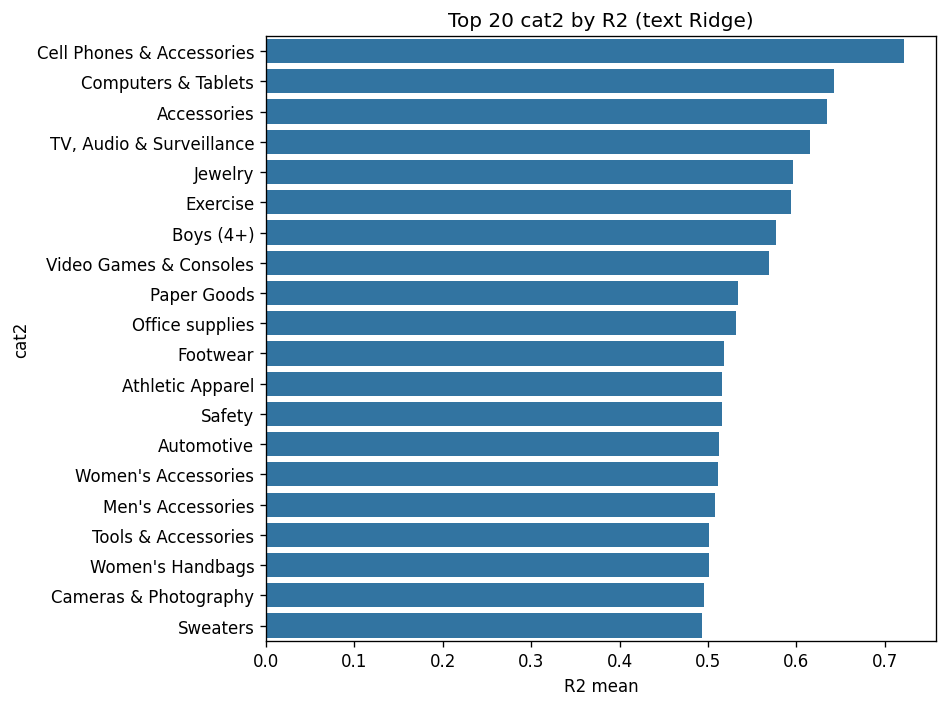

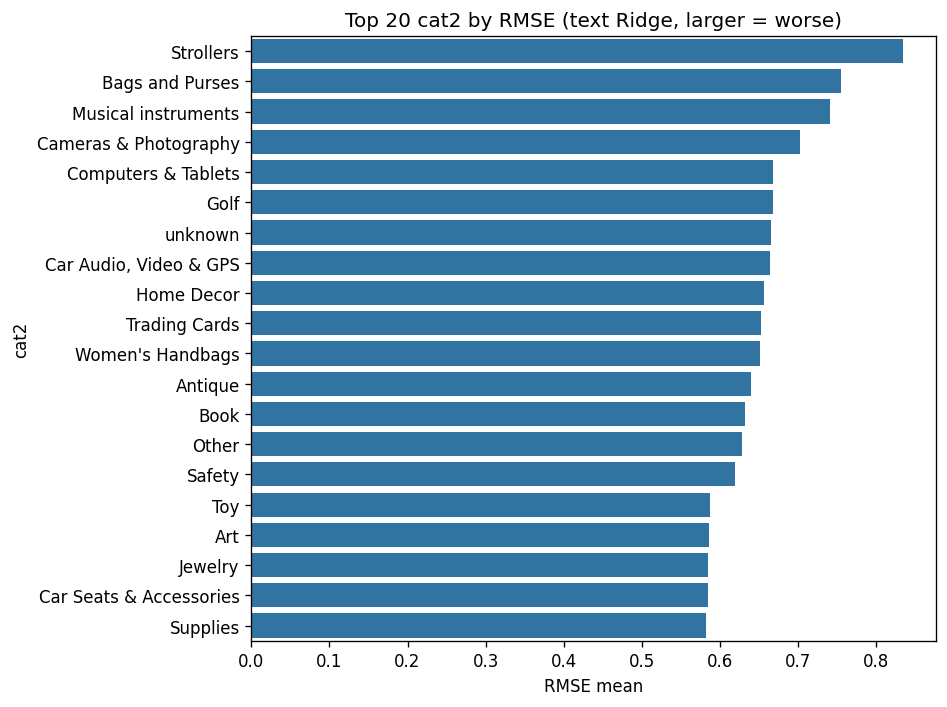

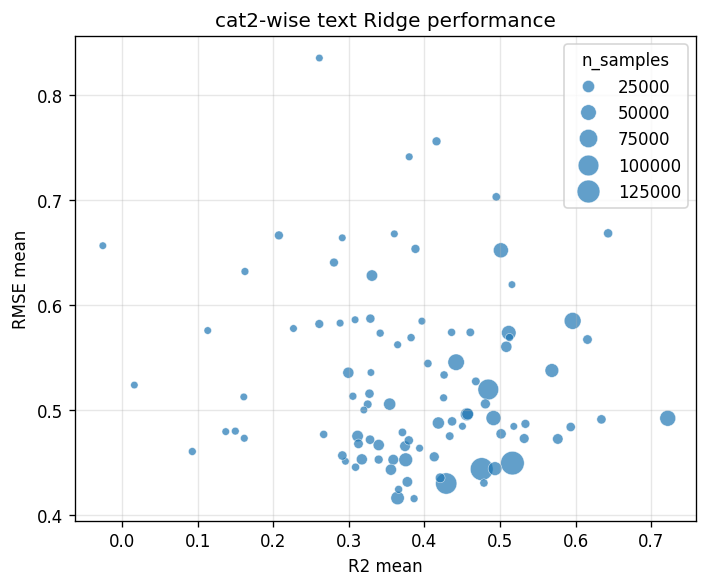

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한 번만 설정
plt.rcParams["figure.dpi"] = 120

# 1) cat2별 R² 상위 20개 바차트
top_r2 = cat2_metrics_df.sort_values("r2_mean", ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_r2,
    x="r2_mean",
    y="cat2"
)
plt.xlabel("R2 mean")
plt.ylabel("cat2")
plt.title("Top 20 cat2 by R2 (text Ridge)")
plt.tight_layout()
plt.show()

# 2) cat2별 RMSE 상위 20개 (오차가 큰 쪽) 바차트
worst_rmse = cat2_metrics_df.sort_values("rmse_mean", ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=worst_rmse,
    x="rmse_mean",
    y="cat2"
)
plt.xlabel("RMSE mean")
plt.ylabel("cat2")
plt.title("Top 20 cat2 by RMSE (text Ridge, larger = worse)")
plt.tight_layout()
plt.show()

# 3) cat2별 R² vs RMSE 산점도 (샘플 수에 따라 점 크기 조절)
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=cat2_metrics_df,
    x="r2_mean",
    y="rmse_mean",
    size="n_samples",
    sizes=(20, 200),
    alpha=0.7
)
plt.xlabel("R2 mean")
plt.ylabel("RMSE mean")
plt.title("cat2-wise text Ridge performance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


R²가 높다는 건
“그 카테고리는 텍스트가 가격 정보를 풍부하게 가지고 있다”는 뜻

오른쪽 아래로 갈수록 좋은 카테고리
(R² 높고 RMSE 낮음)

왼쪽 위로 갈수록 어려운 카테고리
(R² 낮고 RMSE 큼)

샘플이 많은데도 성능이 낮다면
텍스트 정보만으로는 한계가 있는 카테고리라는 의미